# 路径

In [1]:
def setProjectPath(projectPath):
    import os
    import sys
    root=os.path.abspath(projectPath)
    print(root)
    sys.path.append(root)
    os.environ["TORCH_HOME"]=r"E:\Data\torch-model"
    import warnings  
    warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")

projectPath=r'D:\project_meta\NNproject\NNI'
setProjectPath(projectPath)

D:\project_meta\NNproject\NNI


In [2]:
import mne
datasetFolder=r'D:\dataset\driver_dataset\DROZY\DROZY'
outputFolder=r'D:\project_meta\NNproject\NNI\output'
from project.dataprocess.FolderTree import *
datasetDict=getDataPath(datasetFolder)
outputDict=getOutPath(outputFolder)
import pprint
pprint.pprint(datasetDict)
pprint.pprint(outputDict)

{'annotation_auto_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-auto',
 'annotation_manual_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-manual',
 'kinect_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\kinect-intrinsics.yaml',
 'kss_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\KSS.txt',
 'psg_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\psg',
 'pvt_rt_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\pvt-rt',
 'videos_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\videos_i8'}
{'ECG_filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\ECG',
 'ECG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\ECG_table.csv',
 'ECG_uniformfilted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\ECG',
 'EEG_filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\EEG',
 'EEG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\EEG_table.csv',
 'EEG_uniformfilted_folder': 'D:\\project_

# 数据集


## 生成数据集源数据

In [3]:
from project.dataprocess.FacePrrocess import *
from project.dataprocess.DatasetProcess import *
videoFolder=datasetDict['videos_folder']
levelFramesFoler=outputDict['level_frames_folder']
kssFramesFolder=outputDict['kss_frames_folder']
kss_file_path=datasetDict['kss_file']
face_level_frames_folder=outputDict["face_level_frames_folder"]
# getLevelFacesFolder(videoFolder, r'D:\project_meta\NNproject\NNI\output\video_frames\face_level_frames')

# 数据集

In [4]:
from torch.utils.data import *
from torchvisione.datasets import *
import torchvision
from project.dataprocess.transform import *


train_transforms = torchvision.transforms.Compose([
    AddSaltPepperNoise(0.01),
    torchvision.transforms.transforms.RandomRotation(10),  # 随机旋转

    torchvision.transforms.transforms.ColorJitter(0.4, 0.4, 0.4, 0.2),  # 随机颜色抖动
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]),
])



In [5]:
import os 
LEVEIDSplitFolder=face_level_frames_folder
listID=os.listdir(LEVEIDSplitFolder)
listID=sorted([int(i) for i in listID ])
from sklearn.model_selection import KFold
kflod=KFold(n_splits=7)
kflod_result=list(kflod.split(listID))
kflod_result[0]

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]), array([0, 1]))

In [6]:
trainIDList=kflod_result[0][0]
testIDList=kflod_result[0][1]
DatasetList=[]
for ID in listID:
    path=os.path.join(LEVEIDSplitFolder,f'{ID}')
    DatasetList.append(ImageFolder(path))

In [7]:
kflod_result[0][0]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [8]:
kflod_result[0][0]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [9]:

trainDatasetList = []
for i, item in enumerate(DatasetList):
    if i  in kflod_result[0][0]:
        item.transform=train_transforms
        trainDatasetList.append(item)
trainDataset=ConcatDataset(trainDatasetList)
print(len(trainDataset))

4403


1


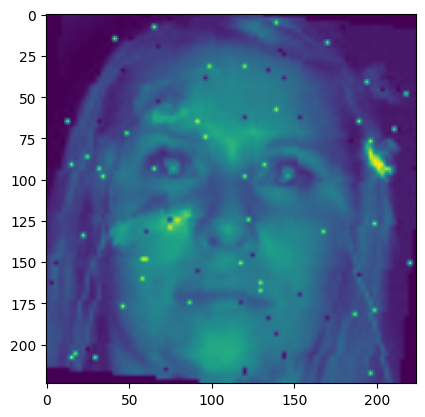

In [10]:
import random
data=trainDataset[random.randint(0,len(trainDataset))]
import matplotlib.pyplot as plt
print(data[1])
plt.imshow(data[0][0])


In [11]:
data[0]*256

tensor([[[-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         ...,
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608]],

        [[-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         ...,
         [-245.9608, -245.9608, -245.9608,  ..., -245.9608, -245.9608,
          -245.9608],
         [-245.9608, -245.9608, -245.960

In [12]:
kflod_result[0][1]

array([0, 1])

In [13]:
testDatasetList = []
for i, item in enumerate(DatasetList):
    if i  in kflod_result[0][1]:
        item.transform=train_transforms
        testDatasetList.append(item)
testDataset=ConcatDataset(testDatasetList)
print(len(testDataset))

893


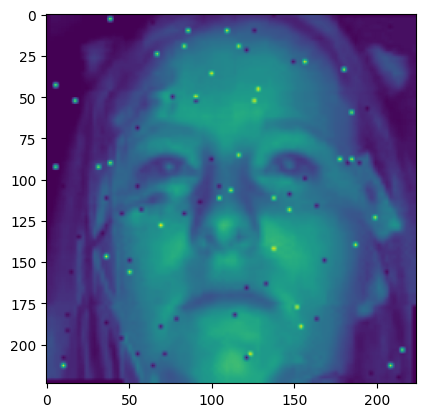

In [14]:
import random
data=testDataset[random.randint(0,len(testDataset))]
import matplotlib.pyplot as plt
plt.imshow(data[0][0])

In [15]:
i=data[0][0]
i.shape

torch.Size([224, 224])

In [16]:
import torch
# 创建一个4维张量
x = torch.randn(2, 3, 4, 5)
# 对维度顺序进行重排
y = x.permute(3, 2, 0, 1)
print("原始张量 x 的形状:", x.shape)
print("重排后的张量 y 的形状:", y.shape)

原始张量 x 的形状: torch.Size([2, 3, 4, 5])
重排后的张量 y 的形状: torch.Size([5, 4, 2, 3])


In [17]:
trainDataloader=DataLoader(trainDataset,batch_size=128,shuffle=True,num_workers=10)
testDataloader=DataLoader(testDataset,batch_size=128,shuffle=True,num_workers=10)

# 模型

In [18]:
from torchvision.models import resnet50,ResNet50_Weights
net=resnet50(weights=ResNet50_Weights.DEFAULT)


In [19]:

in_features = net.fc.in_features
net.fc= torch.nn.Linear(in_features, 3)

In [20]:
from typing import Any, Optional
import pytorch_lightning as pl
from pytorch_lightning.utilities.types import STEP_OUTPUT, TRAIN_DATALOADERS
from project.model.CNN1D import simple_cnn1d
from torchmetrics.functional import accuracy
from torch.utils.tensorboard import SummaryWriter

class TrainModel(pl.LightningModule):
    
    def __init__(self, net,lossFunction,optimizer,*args, **kwargs):
        super().__init__()
        self.Writer=SummaryWriter(log_dir=r"D:\project_meta\NNproject\NNI\output\tensorboar_log")
        self.Model=net
        self.LossFunction=lossFunction
        self.Optimizer=optimizer
        self.Lr_scheduler=torch.lr_scheduler.MultiStepLR(self.Optimizer,[3,5,7])
    def forward(self,x, *args: Any, **kwargs: Any) -> Any:
        y=self.Model(x)
        return y
    def on_train_epoch_end(self) -> None:
        
        return super().on_train_epoch_end()
    
    def training_step(self, batch,batch_idx,*args: Any, **kwargs: Any) -> STEP_OUTPUT:
        self.Optimizer.zero_grad()
        x,y=batch
        y=y.long()
        y_hat=self.Model(x.to(torch.float32))
        loss=self.LossFunction(y_hat,y)
        # print(type(x),type(y),type(y_hat))
        # print(x.shape,y.shape,y_hat.shape)
        # print(y.shape)
        # print(y_hat.shape)
        # print(y[0])
        # print(y_hat[0])
        acc=accuracy(y_hat,y,task='multiclass',num_classes=3)
        pbar={'train_acc':acc}
        # self.Writer.add_scalar('acc',acc,)
        self.log("train_acc", acc, on_step=True, on_epoch=True)
        # self.
        # print(acc)
        return {'loss':loss,'progress_bar':pbar}
    def configure_optimizers(self) :
        return [self.Optimizer],[self.Lr_scheduler]
    def validation_step(self,batch,batch_idx, *args: Any, **kwargs: Any) -> STEP_OUTPUT | None:
        x,y=batch
        y=y.long()
        x=x.to(torch.float32)
        y_hat=self.Model(x)
        loss=self.LossFunction(y_hat,y)
        # print(y.shape)
        # print(y_hat.shape)
        # print(y[0])
        # print(y_hat[0])
        acc=accuracy(y_hat,y,task='multiclass',num_classes=3)
        self.log("test_acc", acc, on_step=False, on_epoch=True)
        return {'loss':loss}

        

In [21]:
from pytorch_lightning import loggers
from torchsummary import summary
logger=loggers.TensorBoardLogger(save_dir=r'D:\project_meta\NNproject\NNI\notebook\TraineSummery\EEG\EndToEnd\TESST_LOG_PATH',name='FACE_E2E_RESNET_IDSplit')
net=TrainModel(net,torch.nn.CrossEntropyLoss(),optimizer=torch.optim.Adam(net.parameters(),lr=0.01))
summary(net,(3,244,244),device='cpu')
trainer=pl.Trainer(logger=logger,accelerator='cuda',log_every_n_steps=20)
trainer.fit(net,train_dataloaders=trainDataloader,val_dataloaders=testDataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
g:\install\anaconda\envs\nni\lib\site-packages\pytorch_lightning\loops\utilities.py:70: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]           4,096
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
           Conv2d-11          [-1, 256, 61, 61]          16,384
      BatchNorm2d-12          [-1, 256, 61, 61]             512
           Conv2d-13          [-1, 256, 61, 61]          16,384
      BatchNorm2d-14          [-1, 256,


  | Name         | Type             | Params
--------------------------------------------------
0 | Model        | ResNet           | 23.5 M
1 | LossFunction | CrossEntropyLoss | 0     
--------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.057    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

g:\install\anaconda\envs\nni\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:480: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

g:\install\anaconda\envs\nni\lib\site-packages\pytorch_lightning\trainer\call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [27]:

import torch
torch.device('cuda')
print(torch.__version__) 
torch.cuda.device_count()

2.1.1+cpu


0